# 🧪 Wine Rating Dataset - EDA
This notebook performs exploratory data analysis for the wine rating prediction dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(style="whitegrid")

# Load the dataset
file_path = "../dataset/raw/wine_v1.csv" 
df = pd.read_csv(file_path)
print(f"✅ Loaded dataset with shape: {df.shape}")
df.head()

✅ Loaded dataset with shape: (1290, 17)


,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


## 🔍 Missing Values & Data Types

In [2]:
# Handle synthetic rating explanation
if 'Rating' not in df.columns:
    print("⚠️ 'Rating' not found, generating synthetic rating based on price")
    df['price_numeric'] = df["Price"].apply(
        lambda x: float(re.search(r'(\d+\.?\d*)', str(x)).group(1))
        if pd.notna(x) and re.search(r'\d+\.?\d*', str(x))
        else 0
    )
    df['Rating'] = df['price_numeric'] * 0.2 + 3.0
    df.loc[df['Rating'] > 5.0, 'Rating'] = 5.0


⚠️ 'Rating' not found, generating synthetic rating based on price


In [3]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)


Secondary Grape Varieties    802
Appellation                  646
Region                       166
Style                         78
Characteristics               37
Grape                         15
Closure                       11
Unit                           9
ABV                            9
Vintage                        7
Country                        6
Type                           5
Description                    4
dtype: int64

In [ ]:
# Display data types and unique counts for categorical insight
df.dtypes, df.nunique()

## 📊 Univariate Analysis

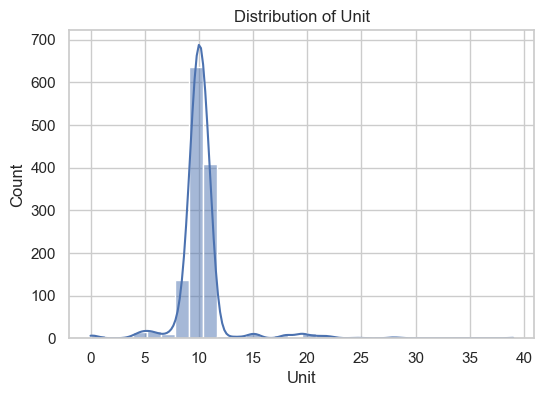

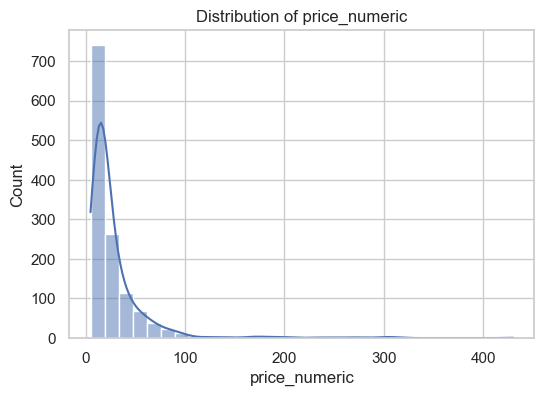

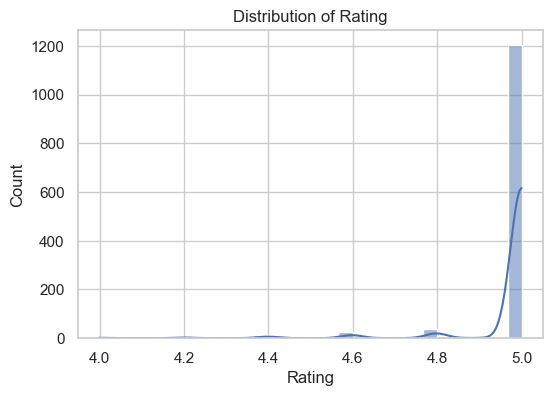

In [4]:
# Numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plot distributions
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


## 🧮 Correlation Matrix (Numeric Features)

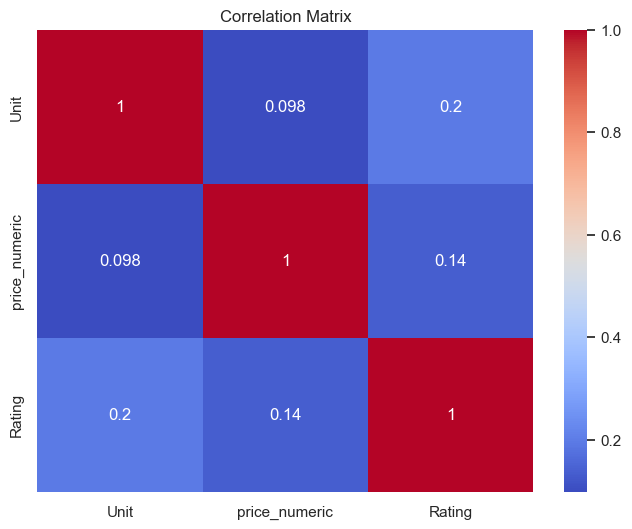

In [5]:
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 📈 Rating vs Numeric Features

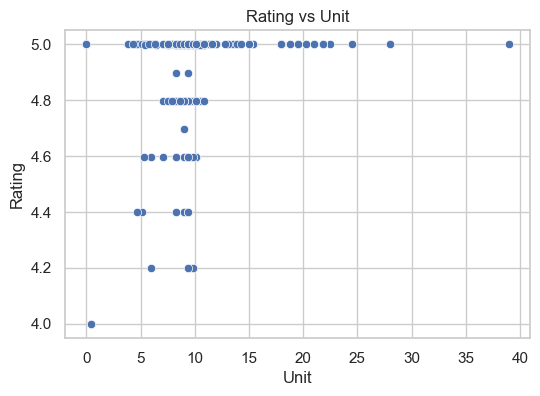

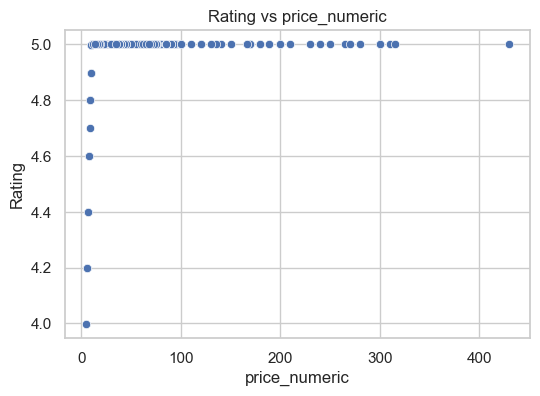

In [6]:
target = "Rating"

for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=col, y=target)
        plt.title(f"{target} vs {col}")
        plt.show()


## 🏷️ Categorical Features Overview

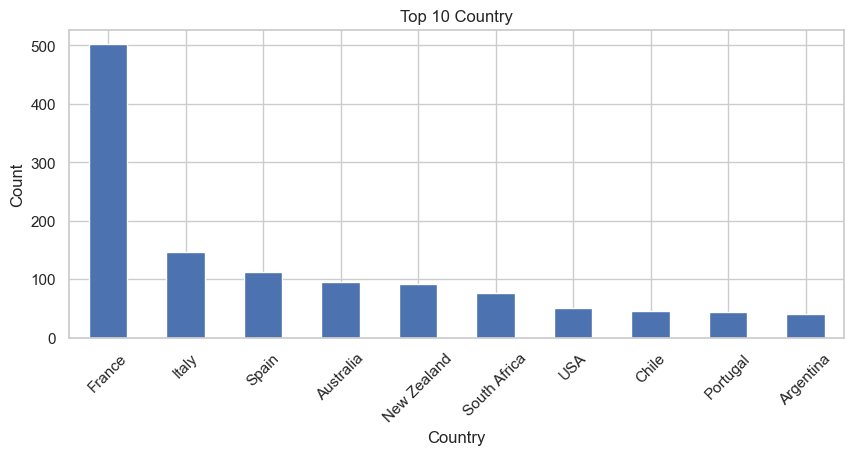

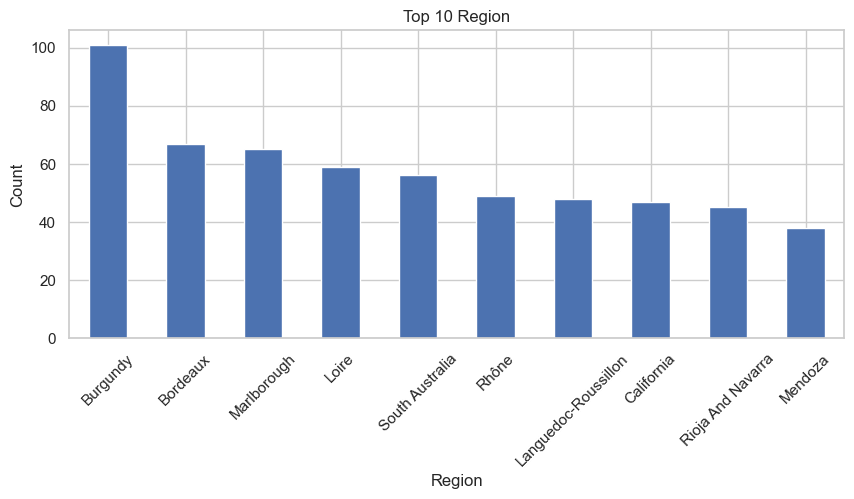

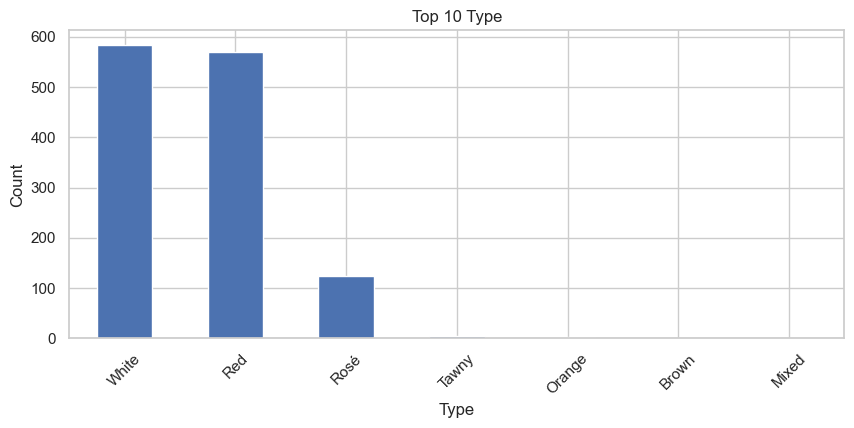

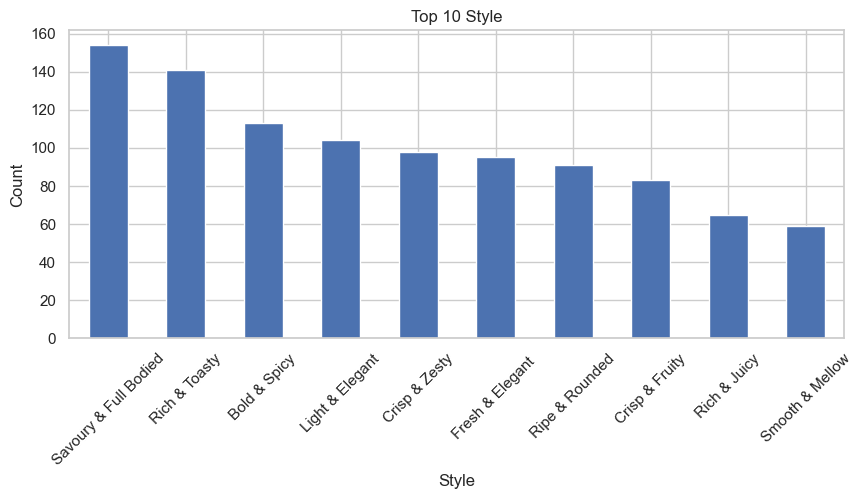

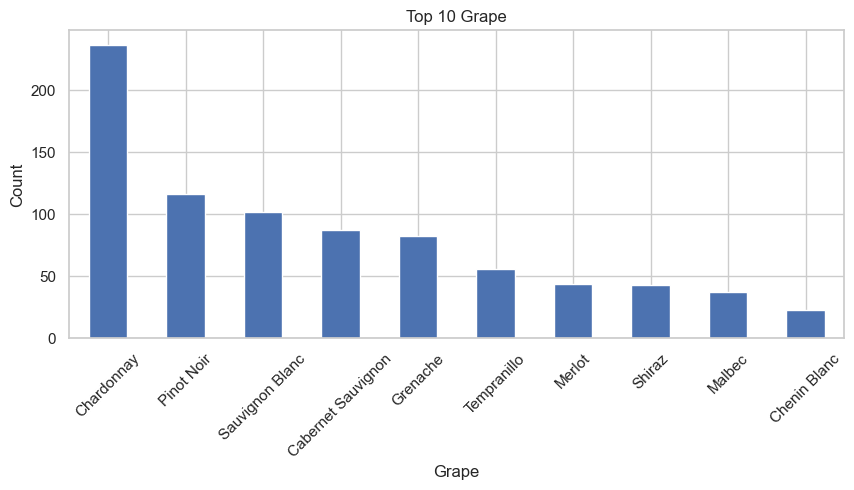

In [7]:
cat_cols = ['Country', 'Region', 'Type', 'Style', 'Grape']
cat_cols = [col for col in cat_cols if col in df.columns]

# Bar plots for top categories
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


## 🎯 Rating vs Categorical Features

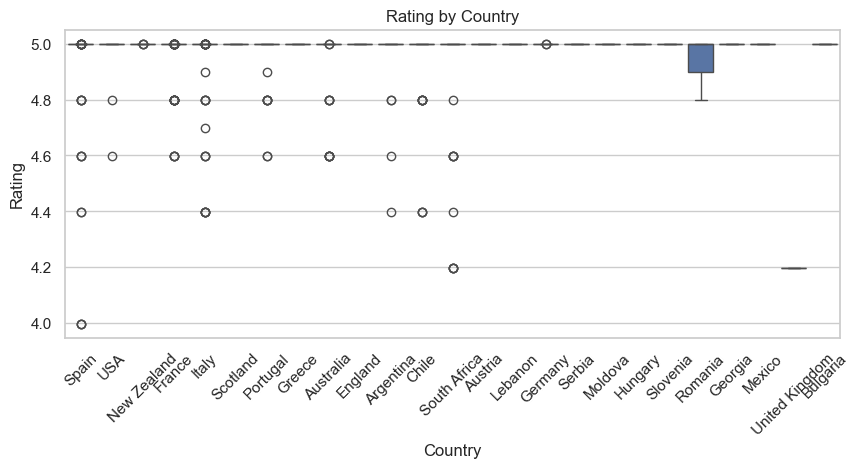

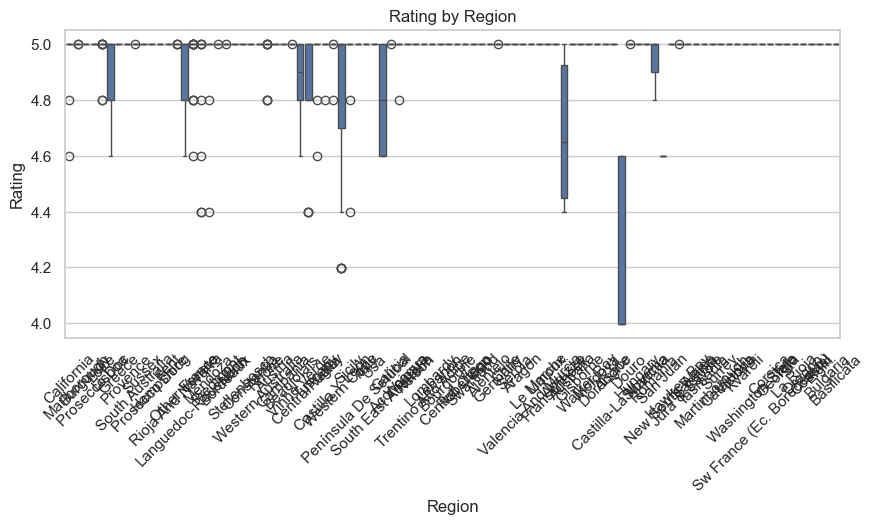

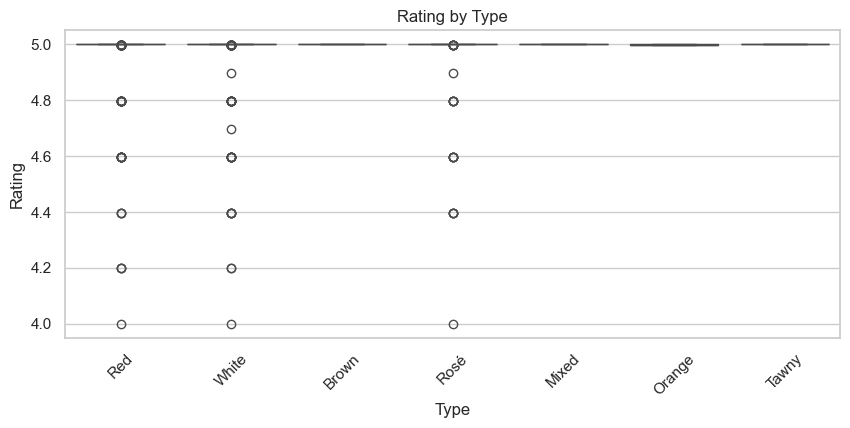

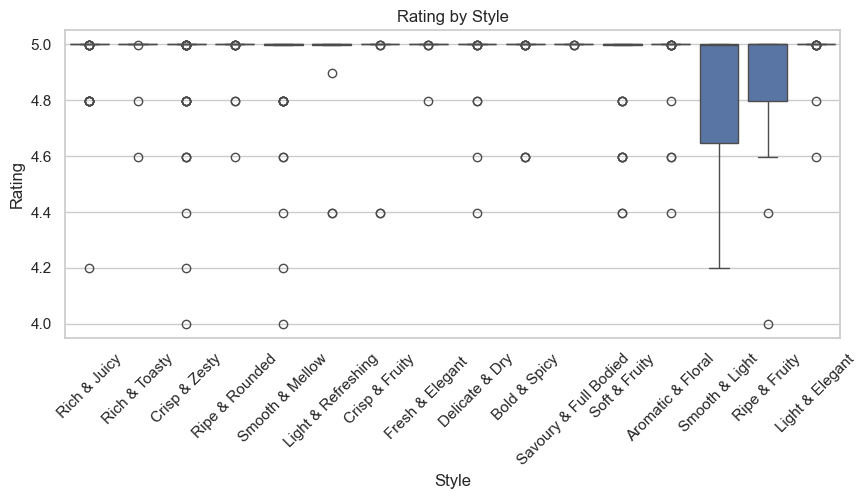

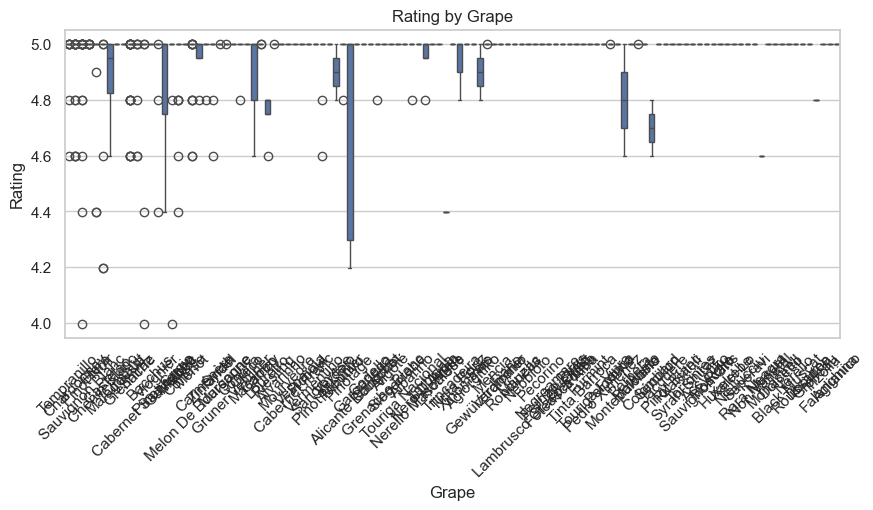

In [8]:
# Boxplots for categorical features
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col, y=target)
    plt.title(f"{target} by {col}")
    plt.xticks(rotation=45)
    plt.show()


## ✅ Summary
- Handled missing values
- Visualized distributions
- Explored feature-target relationships

You’re now ready to preprocess and train the model!